## Импорт модулей

In [2033]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка датафрейма

In [2034]:
df = pd.read_csv("bank1.csv", sep=";")

In [2035]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,10,34,9,180,93023,1,"8,90",3,0,1,0,0,0,0
1,17,38,14,130,95010,4,"4,70",3,134,1,0,0,0,0
2,19,46,21,193,91604,2,"8,10",3,0,1,0,0,0,0
3,30,38,13,119,94104,1,"3,30",2,0,1,0,1,1,1
4,39,42,18,141,94114,3,"5,00",3,0,1,1,1,1,0


### Описание признаков
* ID	Идентификационный номер

* Customer ID	Идентификационный номер клиента

* Age	Возраст клиента в завершенных годах

* Experience	Количество лет профессионального опыта

* Income	Годовой доход клиента ($000)

* ZIPCode	Почтовый индекс домашнего адреса

* Family	Размер семьи клиента

* CCAvg	Средние расходы по кредитным картам в месяц ($000)

* Education	Уровень образования. 1: Бакалавр; 2: Магистр; 3: Продвинутый/Профессиональный

* Mortgage	Сумма ипотечного кредита, если есть ($000)

* Personal Loan	Принял ли клиент персональный кредит, предложенный в последней кампании?

* Securities Account	Есть ли у клиента ценная бумага с банком?

* CD Account	Есть ли у клиента сертификат депозитного вклада (CD) с банком?

* Online	Использует ли клиент интернет-банкинг?

* CreditCard	Использует ли клиент кредитную карту, выданную UniversalBank?

## Разведочный анализ данных

На какие вопросы может дать ответы РАД?
- сколько у нас данных? (кол-во объектов и их признаков)
- какие типы данных имеют признаки?
- какой признак является целевым (target)? С какой задачей мы имеем дело? (классификация или регрессия)
- сколько значений пропущено в различных колонках?
- какова статистика распределения значений признаков? Есть ли выбросы (аномальные наблюдения)?
- как признаки соотносятся между собой (коррелируют, влияют друг на друга)? Как признаки влияют на целевой признак?
- для задач классификации: сколько у нас классов - два или больше? Сбалансированы ли классы?
- и др.

В зависимости от формы представления результатов РАД можно разделить на:
- числовой/табличный анализ
- визуальный (графический) анализ

В зависимости от кол-ва одновременно исследуемых признаков РАД можно разделить на:
- одномерный анализ (univariate analysis) - исследование каждого признака в отдельности
- двумерный анализ (bivariate analysis) - исследование взаимного влияния признаков и сравнение их характеристик
- многомерный анализ (multivariate analysis) - сравнение статистических характеристик нескольких признаков 

In [2036]:
# объём данных (строк и столбцов - объектов и признаков)
df.shape

(480, 14)

In [2037]:
# выводим типы данных
df.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIP Code               int64
Family                 int64
CCAvg                 object
Education              int64
Mortgage               int64
Personal Loan          int64
Securities Account     int64
CD Account             int64
Online                 int64
CreditCard             int64
dtype: object

In [2038]:
df['CCAvg'] = df['CCAvg'].str.replace(",", ".", regex=False)  # Замена запятой на точку
df['CCAvg'] = df['CCAvg'].astype(float)



In [2039]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  480 non-null    int64  
 1   Age                 480 non-null    int64  
 2   Experience          480 non-null    int64  
 3   Income              480 non-null    int64  
 4   ZIP Code            480 non-null    int64  
 5   Family              480 non-null    int64  
 6   CCAvg               480 non-null    float64
 7   Education           480 non-null    int64  
 8   Mortgage            480 non-null    int64  
 9   Personal Loan       480 non-null    int64  
 10  Securities Account  480 non-null    int64  
 11  CD Account          480 non-null    int64  
 12  Online              480 non-null    int64  
 13  CreditCard          480 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 52.6 KB


In [2040]:
# Целевой признак
target = 'CreditCard'

# Количество пропущенных значений
df.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [2041]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [2042]:
df["Personal Loan"].value_counts()

Personal Loan
1    480
Name: count, dtype: int64

In [2043]:
# Описание всех данных
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,480.0,2390.650000,1394.393674,10.0,1166.50,2342.0,3566.0000,4981.0
Age,480.0,45.066667,11.590964,26.0,35.00,45.0,55.0000,65.0
Experience,480.0,19.843750,11.582443,0.0,9.00,20.0,30.0000,41.0
Income,480.0,144.745833,31.584429,60.0,122.00,142.5,172.0000,203.0
ZIP Code,480.0,93153.202083,1759.223753,90016.0,91908.75,93407.0,94705.5000,96008.0
Family,480.0,2.612500,1.115393,1.0,2.00,3.0,4.0000,4.0
CCAvg,480.0,3.905354,2.097681,0.0,2.60,3.8,5.3475,10.0
Education,480.0,2.233333,0.753373,1.0,2.00,2.0,3.0000,3.0
Mortgage,480.0,100.845833,160.847862,0.0,0.00,0.0,192.5000,617.0
Personal Loan,480.0,1.000000,0.000000,1.0,1.00,1.0,1.0000,1.0


<Axes: xlabel='CreditCard'>

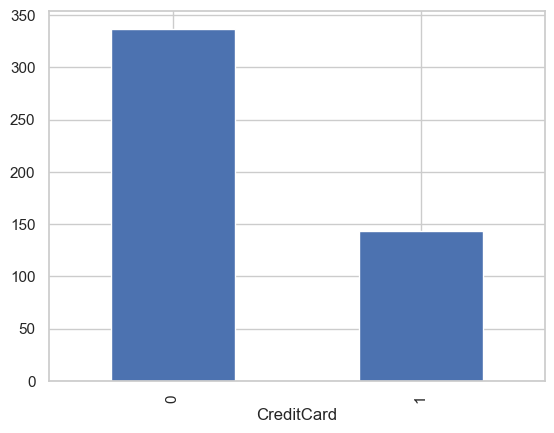

In [2044]:
df[target].value_counts(normalize=False).plot.bar()

<Axes: ylabel='Density'>

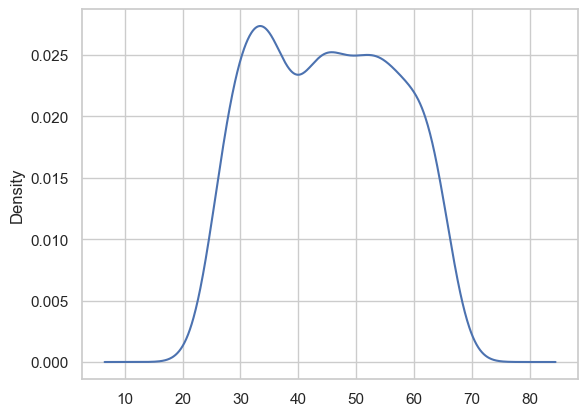

In [2045]:
df['Age'].plot.density()

<Axes: ylabel='Age'>

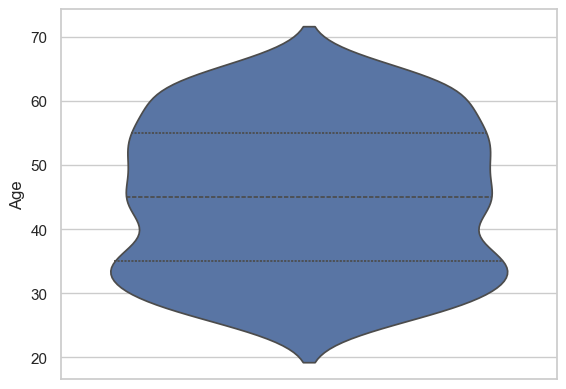

In [2046]:
# применяем тему со светлыми линиями сетки
sns.set_theme(style="whitegrid")

# строим диаграмму violin plot ("скрипичная диаграмма")
sns.violinplot(y=df["Age"], inner="quartile")

## Двумерный анализ данных

In [2047]:

features = [
    'Age', 'Experience', 'Income', 'Family', 'CCAvg', 
    'Education', 'Mortgage', 'Securities Account', 
    'CD Account', 'Online', 'CreditCard'
]

corr = df[features].corr()

corr

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994455,0.021260,-0.001712,-0.002501,-0.009196,0.041622,-0.008705,0.053308,0.028577,0.026542
Experience,0.994455,1.000000,0.013587,0.005161,-0.019904,-0.020217,0.038025,-0.005240,0.059372,0.032235,0.032025
Income,0.021260,0.013587,1.000000,-0.020876,0.214980,0.122170,0.189672,-0.053058,0.069669,0.075136,0.013477
Family,-0.001712,0.005161,-0.020876,1.000000,0.005412,-0.239996,0.070556,-0.106005,-0.003085,-0.039178,0.050746
CCAvg,-0.002501,-0.019904,0.214980,0.005412,1.000000,0.077968,0.023258,0.017312,0.037360,-0.017313,0.025835
Education,-0.009196,-0.020217,0.122170,-0.239996,0.077968,1.000000,-0.026044,-0.041852,-0.071054,0.000567,-0.038536
Mortgage,0.041622,0.038025,0.189672,0.070556,0.023258,-0.026044,1.000000,-0.016809,0.084738,0.063899,0.039181
Securities Account,-0.008705,-0.005240,-0.053058,-0.106005,0.017312,-0.041852,-0.016809,1.000000,0.464282,0.059631,-0.012052
CD Account,0.053308,0.059372,0.069669,-0.003085,0.037360,-0.071054,0.084738,0.464282,1.000000,0.385804,0.514046
Online,0.028577,0.032235,0.075136,-0.039178,-0.017313,0.000567,0.063899,0.059631,0.385804,1.000000,-0.043762


<Axes: >

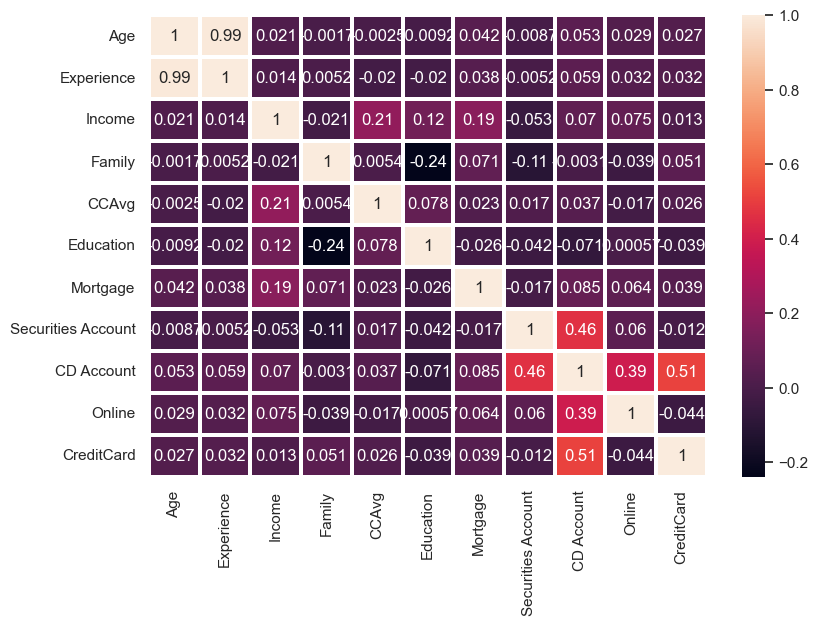

In [2048]:
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5)


Можем увидеть сильную зависимость между признаком «Age» и «Experience».
Так же есть хорошая зависимость между «Online» и «CD Account», «CreditCard» и «CD Account», «Securities Account» и «CD Account»

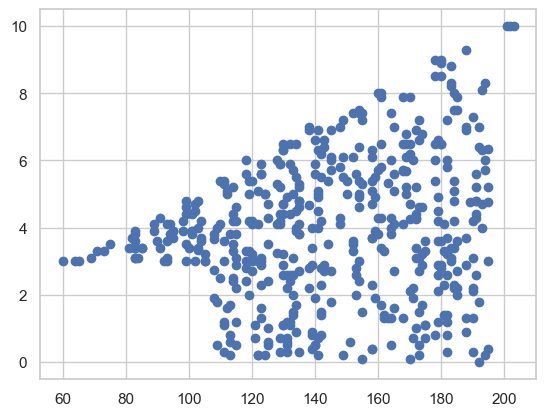

In [2049]:
plt.scatter(df['Income'], df['CCAvg'])

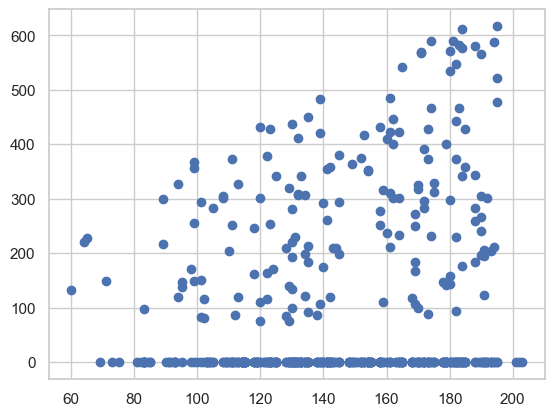

In [2050]:
plt.scatter(df['Income'], df['Mortgage'])

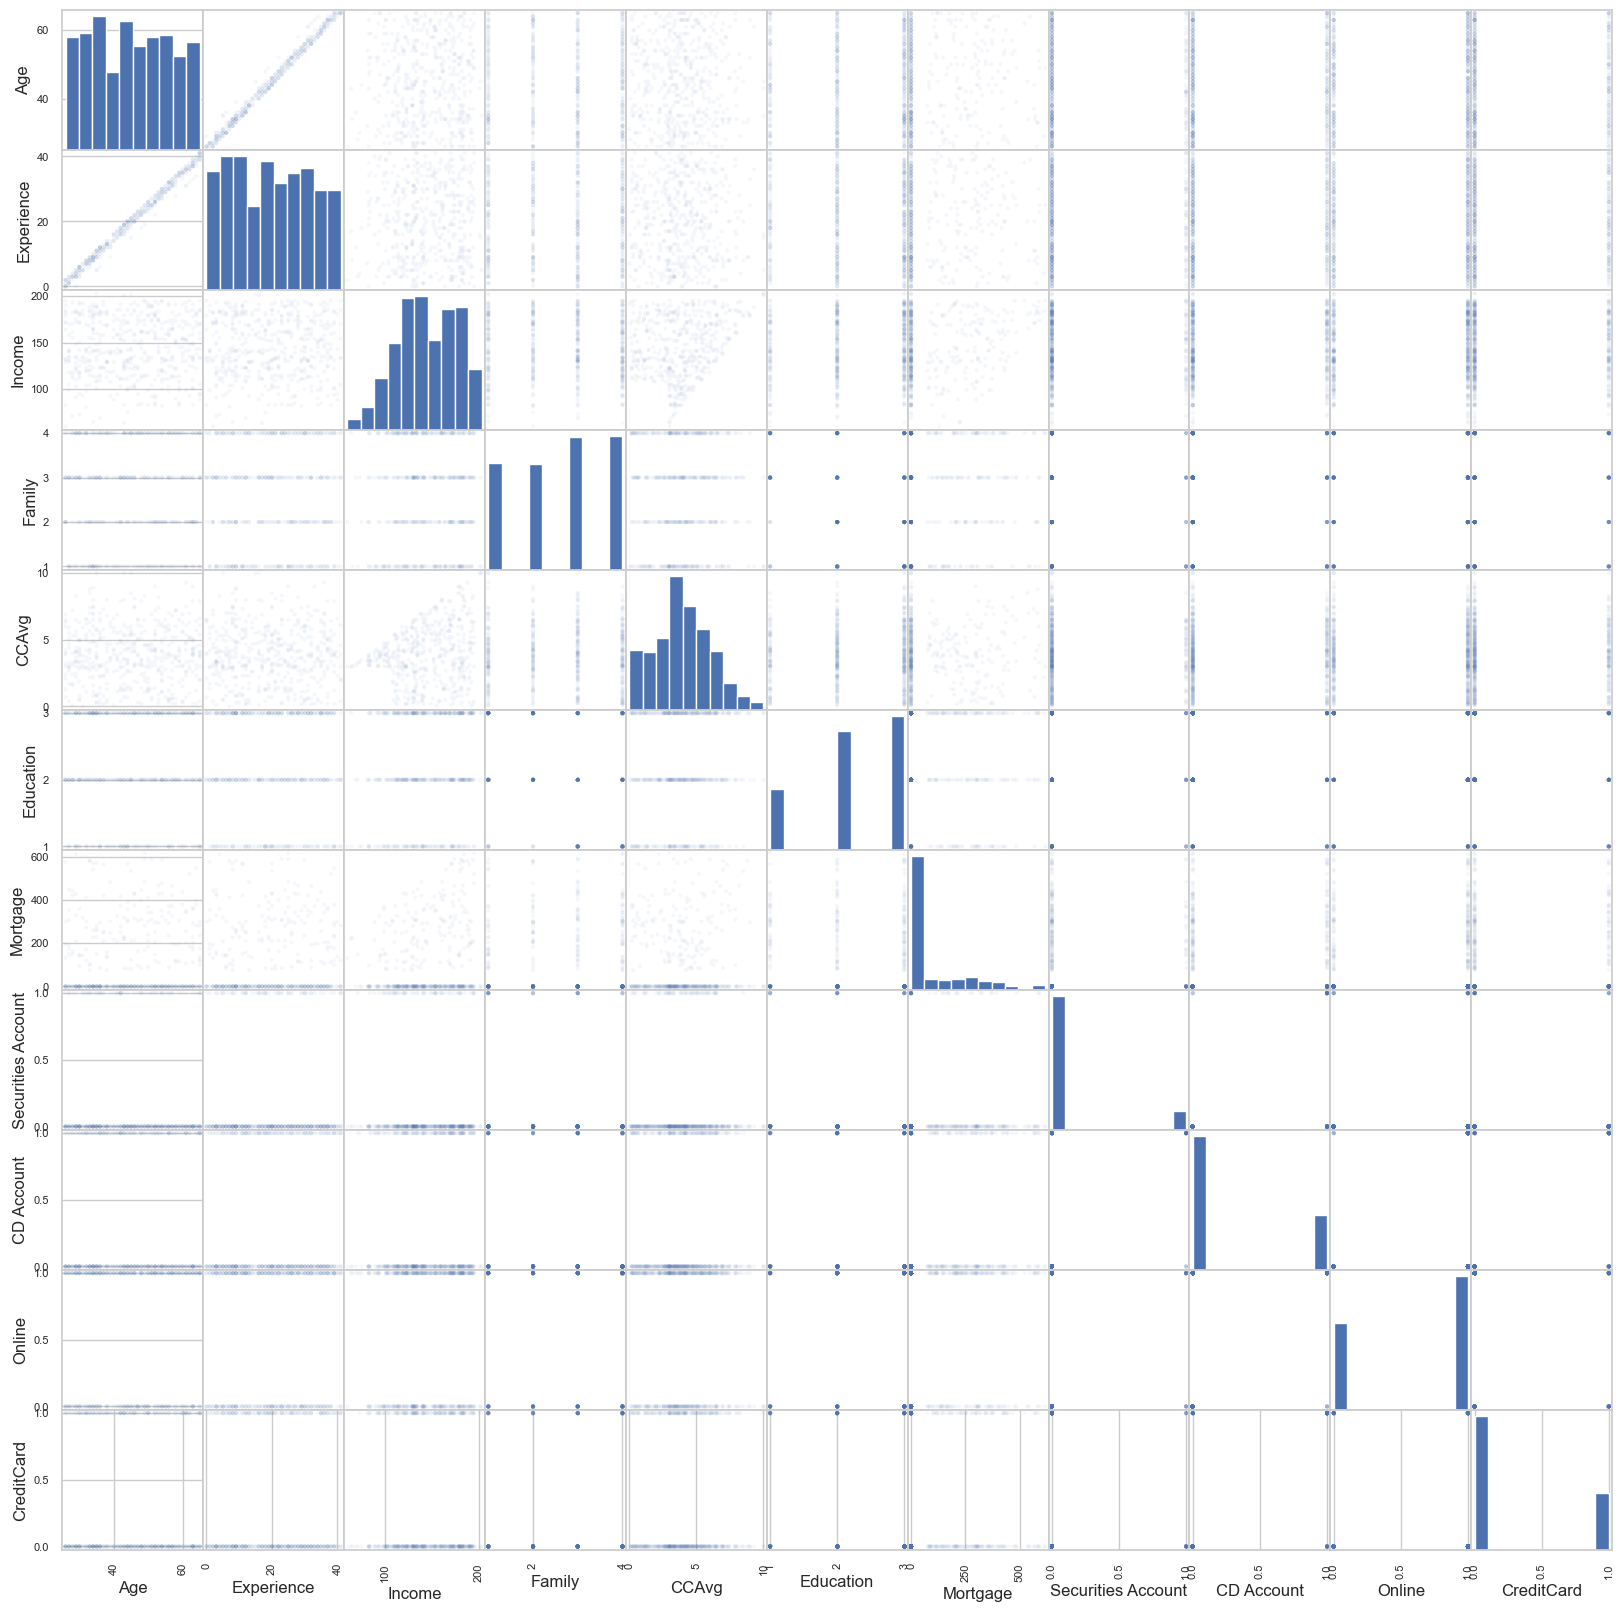

In [2051]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[features], alpha=0.05, figsize=(20, 20));

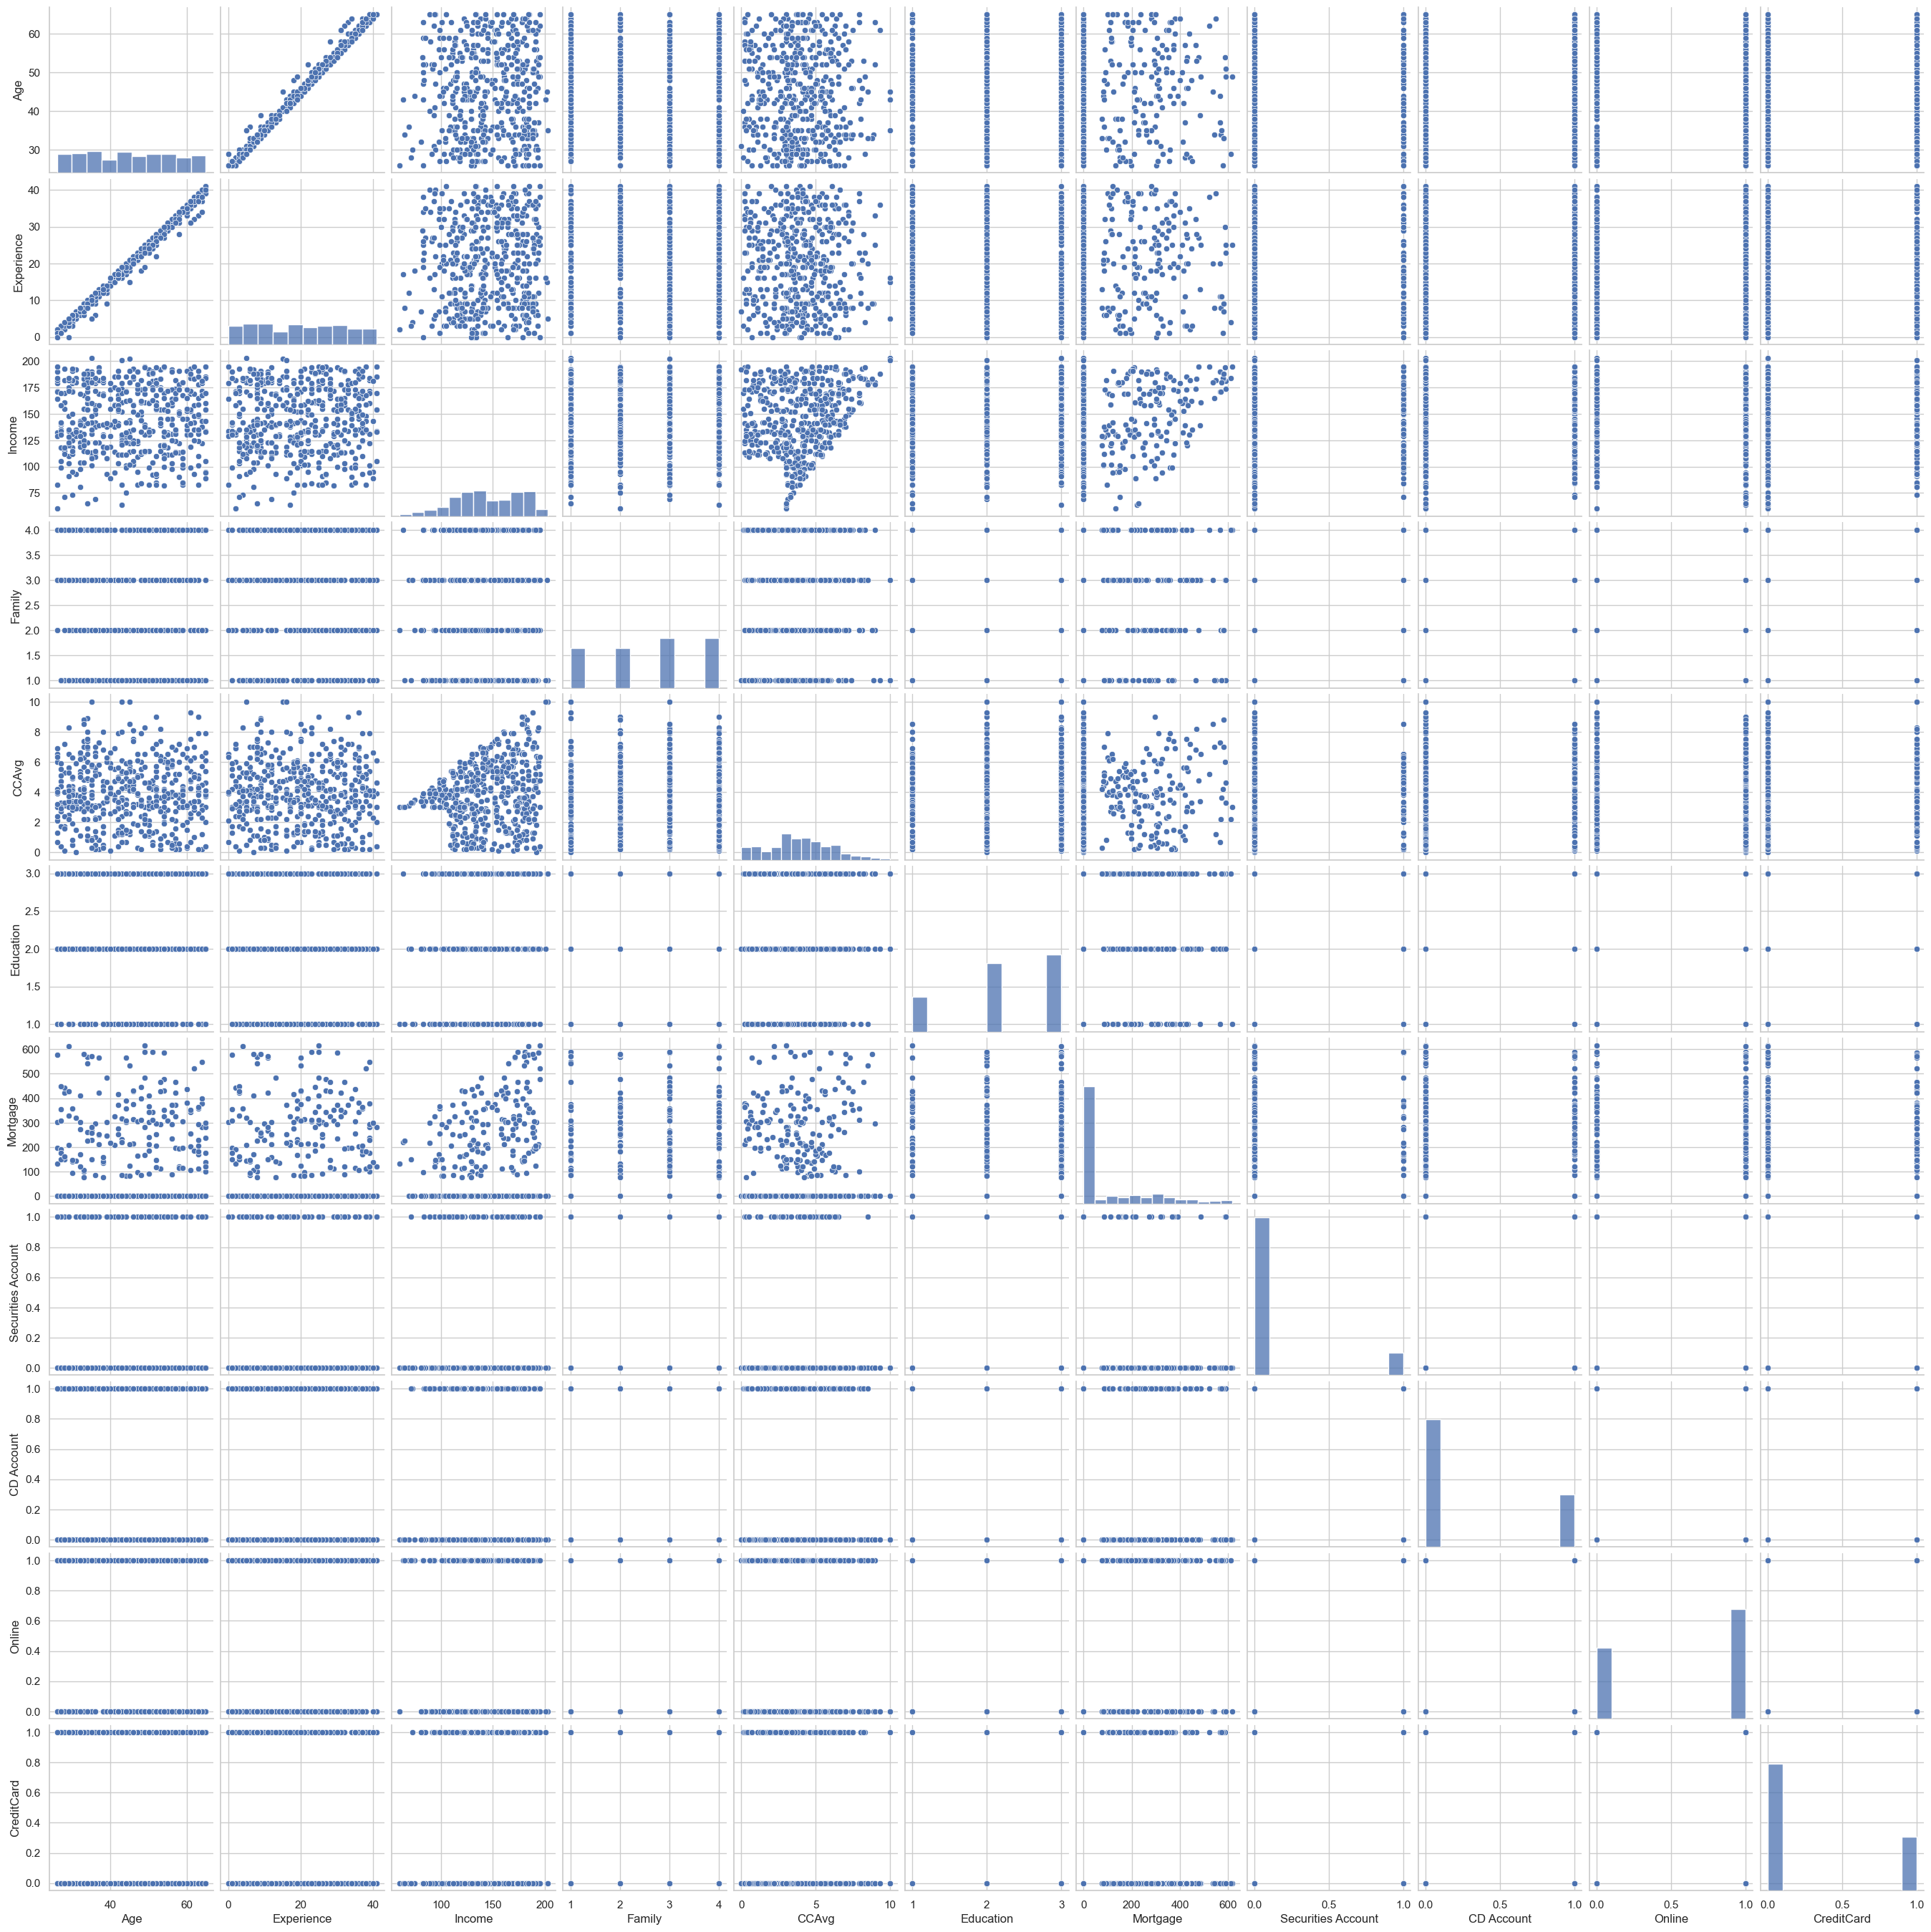

In [2052]:
sns.pairplot(df[features])

## Многомерный анализ данных

In [2053]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2054]:
df[target].value_counts()

CreditCard
0    337
1    143
Name: count, dtype: int64

### Modelling

In [2055]:
X = df[[
    'Age', 'Experience', 'Income', 'Family', 'CCAvg', 
    'Education', 'Mortgage', 'CD Account'
]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = df[target]           


In [2056]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [2057]:
from sklearn.metrics import accuracy_score

### KNeighborsClassifier

In [2058]:
from sklearn.neighbors import KNeighborsClassifier

In [2059]:

%%time
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

CPU times: user 1.06 ms, sys: 193 μs, total: 1.26 ms
Wall time: 2.27 ms


KNeighborsClassifier(n_neighbors=1)

In [2060]:
knn.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0])

In [2061]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [2062]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [2064]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)
knn_accuracy

0.710691823899371

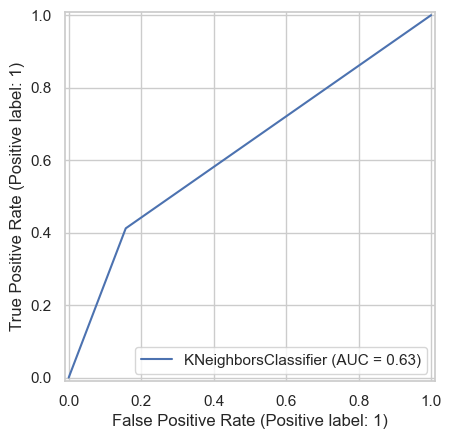

In [2090]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)


### Gaussian Naive Bayes

In [2067]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: user 7.24 ms, sys: 2 ms, total: 9.25 ms
Wall time: 3.18 ms


GaussianNB()

In [2068]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1])

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [2069]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gnb_pred_test)

0.8427672955974843

In [2070]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


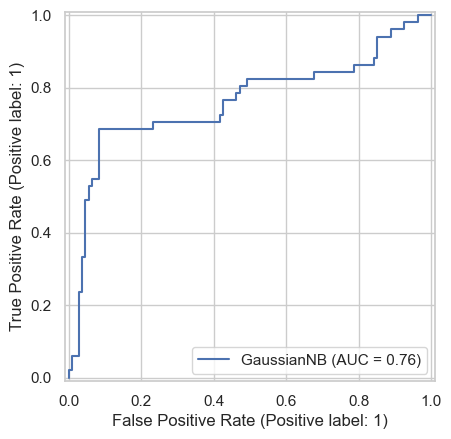

In [2071]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


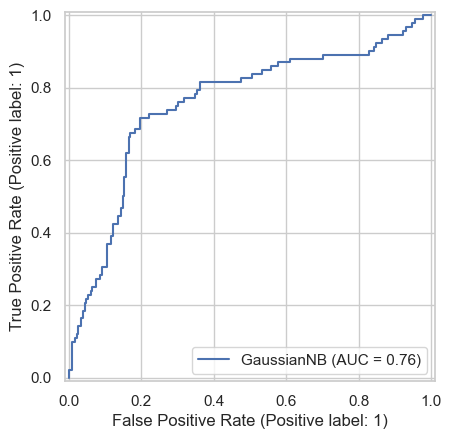

In [2072]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_train, y_train)

### Random Forest Classifier

In [2073]:
from sklearn.ensemble import RandomForestClassifier

In [2074]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: user 274 ms, sys: 32 ms, total: 306 ms
Wall time: 115 ms


In [2075]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1])

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [2076]:
from sklearn.metrics import accuracy_score
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)
rfc_accuracy

0.7672955974842768

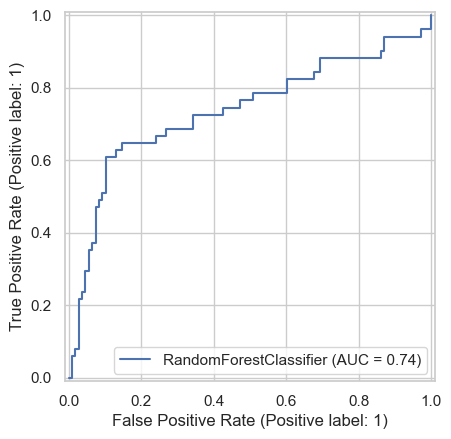

In [2077]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

### Confusion matrix

In [2078]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2079]:
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[92, 16],
       [30, 21]])

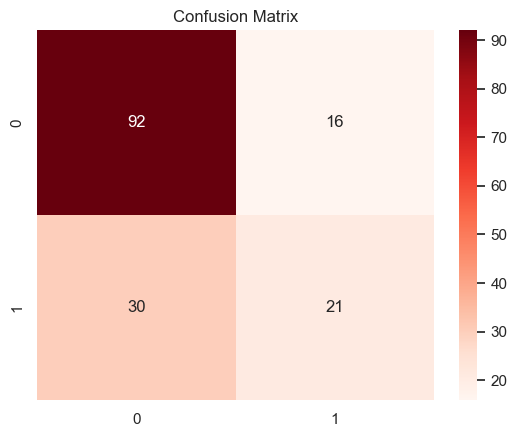

In [2080]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

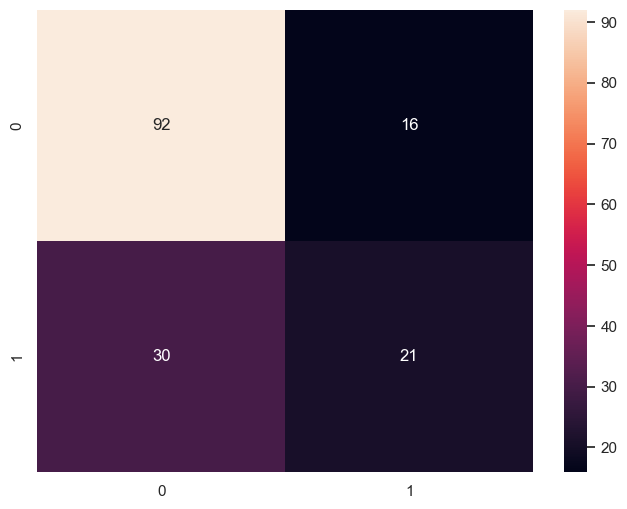

In [2081]:

conf_matrix = confusion_matrix(y_test, y_test_predict)
Y = df[target]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True)
plt.show()

### Полная информация

In [2082]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_test, y_test_predict, average='micro'))
print(recall_score(y_test, y_test_predict, average='micro'))
print(f1_score(y_test, y_test_predict, average='micro'))

0.710691823899371
0.710691823899371
0.710691823899371


In [2083]:
from sklearn.metrics import f1_score

print('test f1_score: ', f1_score(y_test, y_test_predict))

test f1_score:  0.4772727272727273


In [2084]:
from sklearn.linear_model import LogisticRegression


In [2085]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
lr_pred_test = lr.predict(X_test)
display(lr_pred_test[:20], np.array(y_test[:20]))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred_test)
lr_accuracy = accuracy_score(y_test, lr_pred_test)

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [2086]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]

In [2087]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.710692
1,Gaussian Naive Bayes,0.842767
2,Random Forest Classifier,0.767296
3,Logistic Regression,0.836478


In [2088]:
from sklearn.metrics import classification_report
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       108
           1       0.57      0.41      0.48        51

    accuracy                           0.71       159
   macro avg       0.66      0.63      0.64       159
weighted avg       0.69      0.71      0.70       159



### Вывод

С помощью разведочного анализа обнаружилось, что в датасете нет пропущенных значений, а так же присутствуют зависимости нескольких признаков, а конкретно между «Online» и «CD Account», «CreditCard» и «CD Account», «Securities Account» и «CD Account».
Программа продемонстрировала, что есть значительные взаимосвязи между признаками данных клиентов и их использованием кредитных карт. Модели, такие как Logistic Regression и Gaussian Naive Bayes, показали наилучшие результаты по точности.